In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


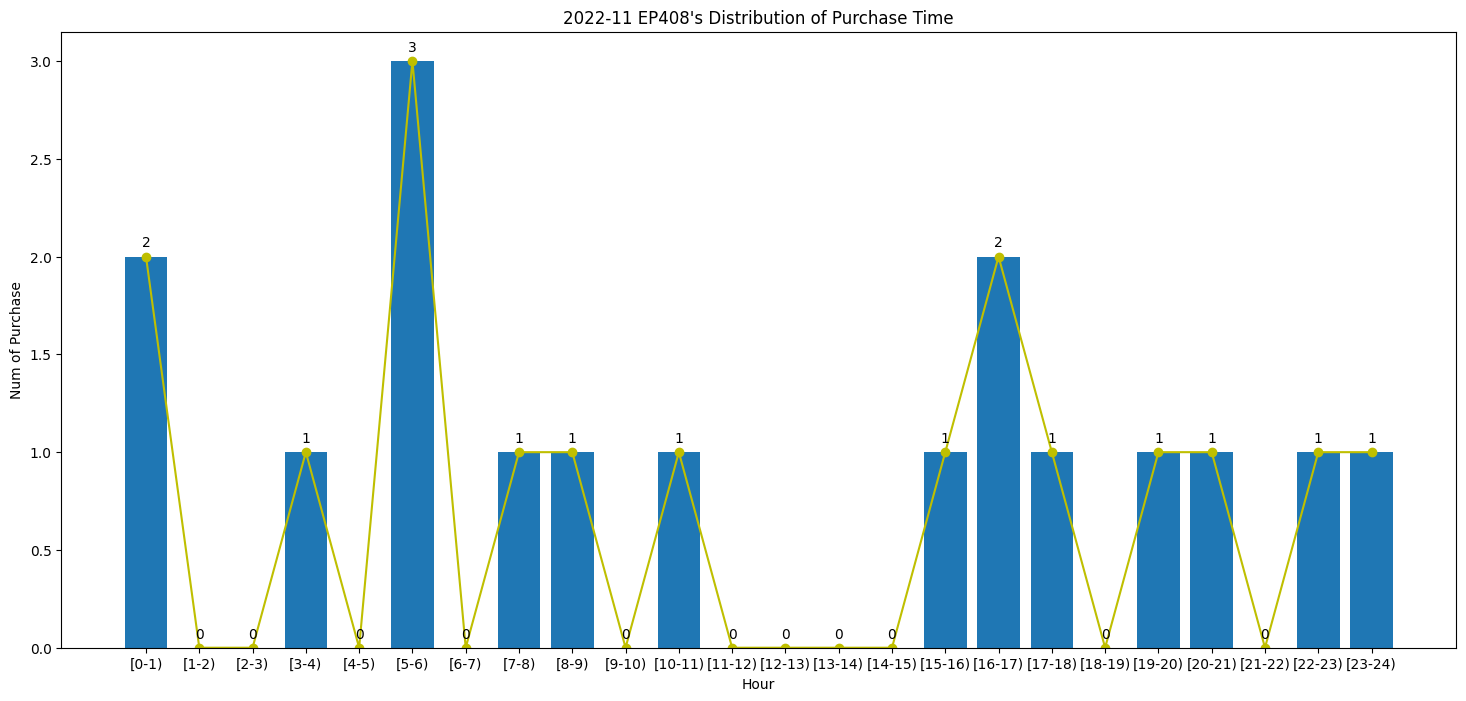

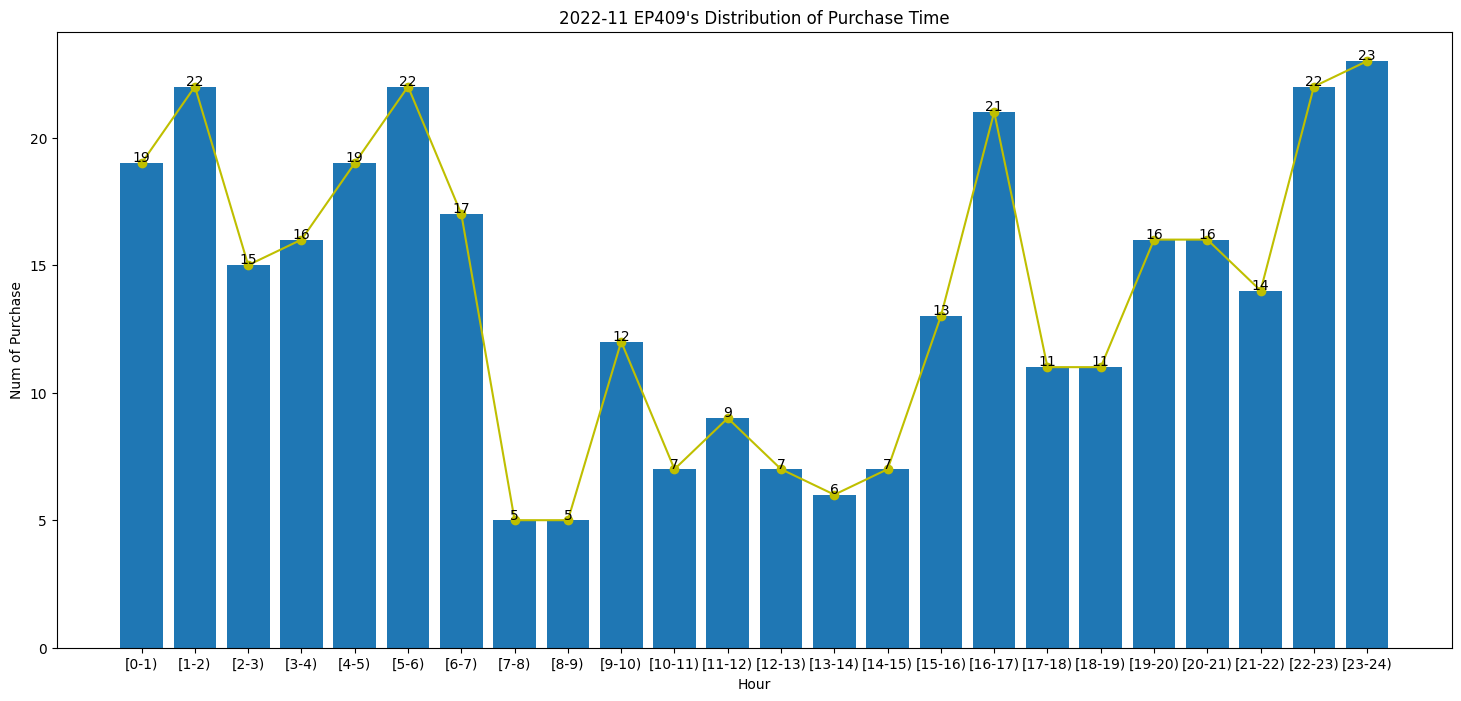

In [5]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from jupyter_best_practices.demo import data_cleansing, handle_distribution_of_time

# import data
df = pd.read_excel("../datasets/data.xlsx")

# data cleansing
df = data_cleansing(df)

# analysis products sku prefix
products = ["EP408", "EP409"]

# get current month
date = datetime.strptime(df["purchase-date"].tail(1).values[0], "%Y-%m-%dT%H:%M:%S%z")
current_month = "{}-{}".format(date.year, date.month)

labels = np.array(
    [
        "[0-1)",
        "[1-2)",
        "[2-3)",
        "[3-4)",
        "[4-5)",
        "[5-6)",
        "[6-7)",
        "[7-8)",
        "[8-9)",
        "[9-10)",
        "[10-11)",
        "[11-12)",
        "[12-13)",
        "[13-14)",
        "[14-15)",
        "[15-16)",
        "[16-17)",
        "[17-18)",
        "[18-19)",
        "[19-20)",
        "[20-21)",
        "[21-22)",
        "[22-23)",
        "[23-24)",
    ]
)

# display the distribution of purchase time
for product in products:
    tmp_df = df[df["sku"].str.contains(product)]
    distributionOfTime = handle_distribution_of_time(tmp_df)

    plt.figure(figsize=(18, 8))
    plt.bar(labels, distributionOfTime)
    plt.title("{} {}'s Distribution of Purchase Time".format(current_month, product))
    plt.xlabel("Hour")
    plt.ylabel("Num of Purchase")
    plt.plot(labels, distributionOfTime, "-o", color="y")
    for index, value in enumerate(distributionOfTime):
        plt.text(index, value + 0.05, "%d" % value, ha="center")
    plt.show()